# VLSI / ASIC

https://www.reddit.com/r/chipdesign/ I feel like htse people live in a different universe.
Cadence and Synposys
Analog vlsi design?

VLSI algorithms
Weste and Harris CMOS VLSI Design https://pages.hmc.edu/harris/cmosvlsi/4e/index.html


Rabaey Digital Integrated Circuits
Baker CMOS Circuit Design, Layout, and Simulation
Razavi Design of Analog CMOS Integrated Circuits
Allen and Holberg CMOS Analog Circuit Design
Gray, Hurst, Lewis, and Meyer Analysis and Design of Analog Integrated Circuits
Bake CMOS mixed signal circuit design
Razavi RF Microelectronics




Jim Williams
Bob Pease
Paul Brokaw
Walt Jung
Doug Self
Randy Slone
Horowitz and Hill
Sedra and Smith
Art of Electronics
Designing Analog Chips
Designing Audio Power Amplifiers
Designing Tube Preamps for Guitar and Bass

SAR ADC
https://github.com/wulffern/sun_sar9b_sky130nm?tab=readme-ov-file
https://github.com/wulffern/cicpy
https://github.com/wulffern/ciccreator
https://analogicus.com/aic2024/

https://ciccreator.readthedocs.io/en/latest/basics/technology.html
"ome common layers are OD, PO, M1, M2, etc. "

gdsii https://www.zerotoasiccourse.com/terminology/gds2/

https://www.zerotoasiccourse.com/terminology/magic/ vlsi layout tool magic
https://www.zerotoasiccourse.com/terminology/openlane/ 

gamma : 500. 

graph partitioning

"rules"
DRC
ERC

PDK
https://skywater-pdk.readthedocs.io/en/main/ sky130nm
https://foss-eda-tools.googlesource.com/?format=HTML
https://tinytapeout.com/

https://woset-workshop.github.io/WOSET2020.html
https://woset-workshop.github.io/ open sourceda tech

# Spice
maybe raw spaice is the way to go
ngspice https://ngspice.sourceforge.io/


ltspice
pspice
hspice
xyce https://xyce.sandia.gov/ parallel

https://qucs.sourceforge.net/ gui 


https://ngspice.sourceforge.io/ngspice-tutorial.html
https://ngspice.sourceforge.io/docs/ngspice-manual.pdf

dc ac transient pole-zero small signal noise sensitity

xspice - mixed circuit analysis
verilog-a
https://yosyshq.readthedocs.io/projects/yosys/en/latest/cmd/write_spice.html yosys write spice


tclspice
stastistical circuit analysis

https://en.wikipedia.org/wiki/Netlist


In [12]:
%%file /tmp/volt_div.cir

* comment


.title This is my Voltage divider!!!!
voltage divider netlist
V1 in 0 1
R1 in out 1k
R2 out 0 2k
.end

* Analysis
.tran 1ms 10ms


.print tran v(1) v(2) v(2)/v(1)
.end

Overwriting /tmp/volt_div.cir


In [13]:
! ngspice -b /tmp/volt_div.cir


No compatibility mode selected!


Circuit: This is my Voltage divider!!!!

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Error: no data saved for Transient analysis; analysis not run
doAnalyses: not found

run simulation(s) aborted
Error: .print: no tran analysis found.

Total analysis time (seconds) = 0

Total elapsed time (seconds) = 0.002 

Total DRAM available = 62983.066 MB.
DRAM currently available = 24869.062 MB.
Maximum ngspice program size =   19.910 MB.
Current ngspice program size =   12.000 MB.

Shared ngspice pages =   10.250 MB.
Text (code) pages =    5.316 MB.
Stack = 0 bytes.
Library pages =    1.965 MB.



pyspice
sudo apt install libngspice0-dev
https://pyspice.fabrice-salvaire.fr/releases/v1.5/example-introduction.html

`circuit.raw_spice +=`

Interesting. I think this is a really thin spice generator?

In [1]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
circuit = Circuit('Voltage Divider')

circuit.V('input', 'in', circuit.gnd, 10@u_V)
circuit.R(1, 'in', 'out', 9@u_kΩ)
circuit.R(2, 'out', circuit.gnd, 1@u_kΩ)


simulator = circuit.simulator(temperature=25, nominal_temperature=25)

analysis = simulator.operating_point()
for node in (analysis['in'], analysis.out): # .in is invalid !
    print('Node {}: {} V'.format(str(node), float(node)))

2024-09-25 11:49:57,519 - PySpice.Spice.Netlist.Node.__init__ - WARNING - Node name 'in' is a Python keyword
2024-09-25 11:49:57,608 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._init_ngspice - WARNING - Unsupported Ngspice version 36
Node in: 10.0 V
Node out: 1.0 V


/tmp/ipykernel_290852/1402177749.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {} V'.format(str(node), float(node)))


In [4]:
print(circuit)
print(simulator)

.title Voltage Divider
Vinput in 0 10V
R1 in out 9kOhm
R2 out 0 1kOhm

.title Voltage Divider
Vinput in 0 10V
R1 in out 9kOhm
R2 out 0 1kOhm
.options TEMP = 25C
.options TNOM = 25C
.end



https://chatgpt.com/c/66edd530-4b40-8008-a334-f3952eb47df3

https://schemdraw.readthedocs.io/en/stable/

https://github.com/nturley/netlistsvg more for verilog?

skidl

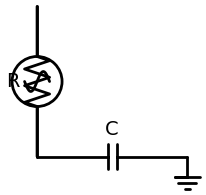

In [5]:
import matplotlib.pyplot as plt
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d.add(elm.SourceSin())  # AC source
    #d.add(elm.Resistor().down().label('R'))  # Resistor
    #d.add(elm.Capacitor().right().label('C'))  # Capacitor
    d.add(elm.Ground())  # Ground

d.draw()
plt.show()


skidl 